In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# stat models for performing linear regression
import statsmodels.api as sm


In [3]:
# We will use this class to generate the data
class DataGenerator:
    ## n_x: the dimensions of x
    ## n_y: the dimensions of y
    def __init__(self, n_x: int, n_y: int):
        self.n_x = n_x
        self.n_y = n_y
    ## n_data: the amount of data to generate 
    def generate(self, n_data):
        pass

# Linear model

We use a design matrix $B \in \mathbb{R}^{n \times m}$ and a covariance matrix $\Sigma \in \mathbb{R}^{n \times n}$ to generate data of the form
$$y = B x + \omega$$, 
where $\omega \sim N(0, \Sigma)$ and $x$ is uniformly generated on a bounded interval.

This can also be written as
$$ y \mid x, B, \Sigma \sim N(B x, \Sigma)$$

With
$$ x \sim \textrm{Uniform}([x_{\min}, x_{\max}])$$


In [4]:
# This class generates data from a linear model
class LinearModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma)$.
        self.Beta = np.random.normal(size = [n_x + 1,  n_y])
        self.sigma = np.random.gamma(1)
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = np.append(X[t, :], 1)
            #print(self.Beta.shape, x.shape, np.dot(x, self.Beta))
            Y[t, :] = np.dot(x, self.Beta) + self.sigma * np.random.normal(size=[1, self.n_y])
            
        return X, Y

In [5]:
# Initialise the generator for one-dimensional X and Y
generator = LinearModelGenerator(1, 1)


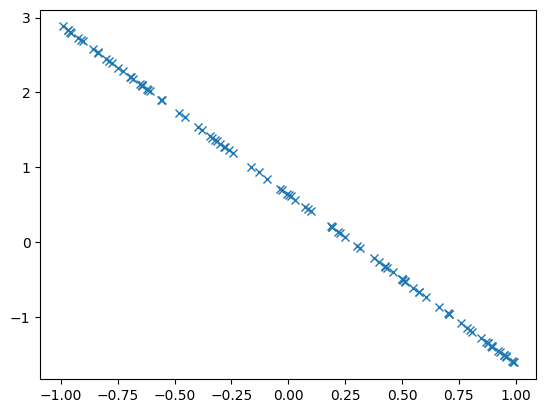

In [6]:
generator.sigma = 0.0
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

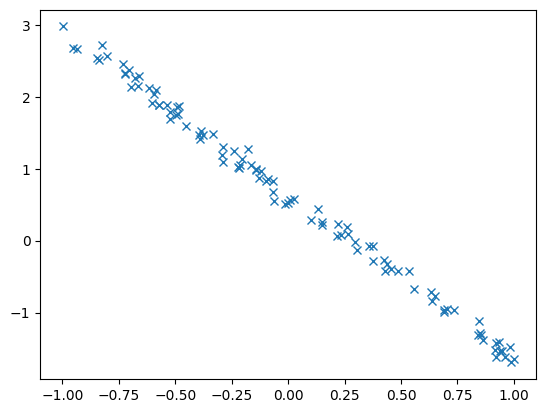

In [7]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

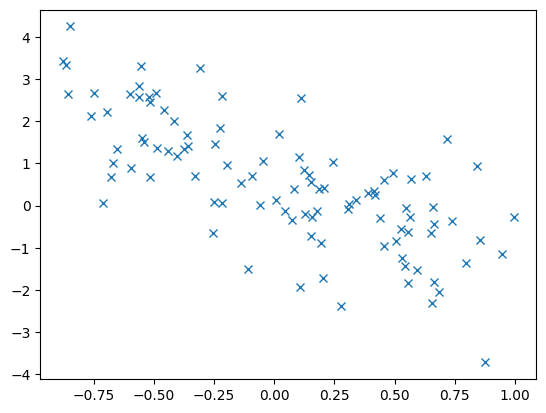

In [8]:
generator.sigma = 1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

(100,)


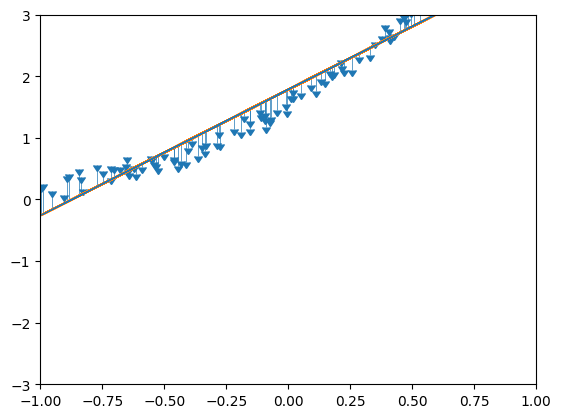

In [30]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')
Xa = sm.add_constant(X)
model = sm.OLS(Y, Xa)
results = model.fit() 
Z = Y.copy()
residual = Y.copy()
for t in range(Xa.shape[0]):
    X[t]
    z = results.get_prediction(Xa[t])
    Z[t] = z.predicted_mean
residual = (Z - Y).reshape(-1)
print(residual.shape)
#plt.plot(X.reshape(-1), Y.reshape(-1), 'x')
plt.clf()
plt.errorbar(X.reshape(-1), Z.reshape(-1), yerr=residual, capsize=0, uplims=True, linewidth=0.5)
plt.plot(X, Z)
plt.axis([-1,1,-3,3])
plt.savefig("linear_fit.pdf")

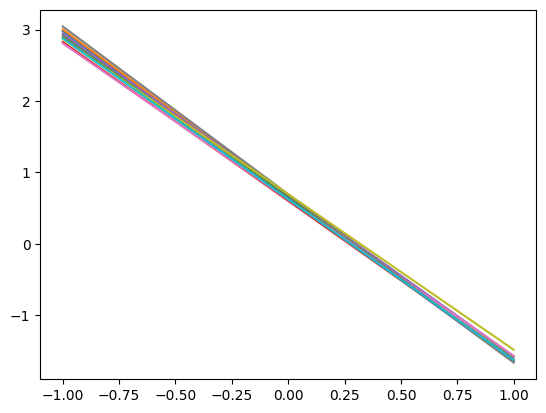

In [10]:
# Now let us plot 10 different lines, one each for every random sample
n_tests = 10
for test in range(n_tests):
    X, Y = generator.generate(10)
    Xa = sm.add_constant(X)
    # get a model from the random sample
    model = sm.OLS(Y, Xa)
    results = model.fit() 
    # get predictions for x = -1, 1
    left = results.get_prediction([1,-1])
    right = results.get_prediction([1,+1])
    plt.plot([-1, 1], [left.predicted_mean, right.predicted_mean])

In [11]:

# This class generates data from a simple non-linear model
class KernelModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int, n_centers: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma$.
        ## Alternatively, we can write this as
        self.C = np.random.normal(size = [n_centers, n_x])
        self.Z = np.random.normal(size = [n_centers, n_y])
        self.n_centers = n_centers
        self.sigma = 1
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = X[t, :]
            D = np.array([np.linalg.norm(x - self.C[c]) for c in range(self.n_centers)])
            Y[t, :] =  np.dot(np.exp(-D), self.Z) + self.sigma * np.random.normal(size=self.n_y) 
        return X, Y

In [12]:

generator = KernelModelGenerator(1, 1, 10)

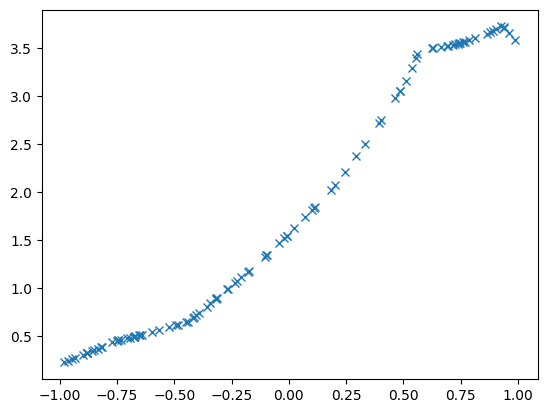

In [13]:
generator.sigma = 0
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

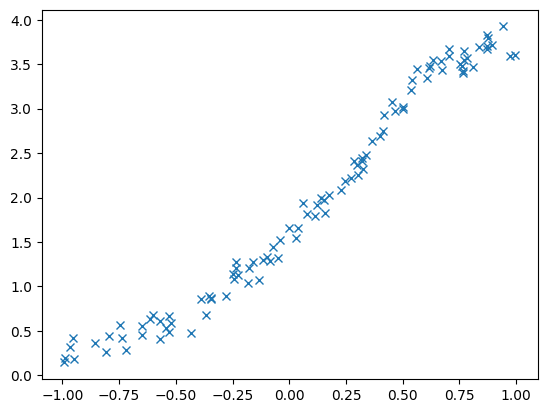

In [14]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

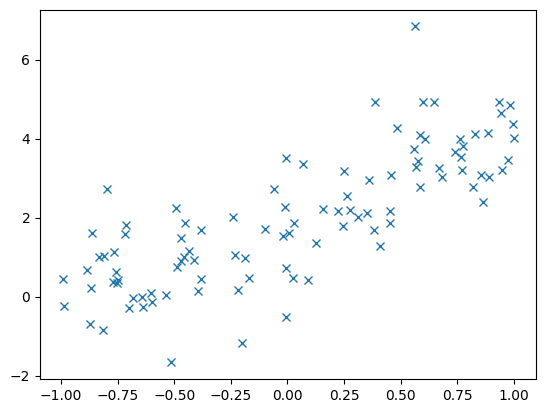

In [19]:
generator.sigma = 1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

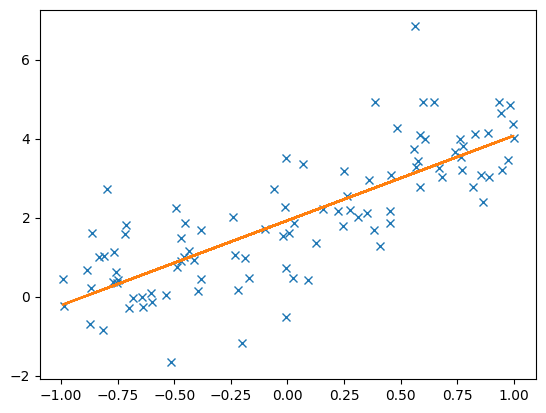

In [20]:
Xa = sm.add_constant(X)
model = sm.OLS(Y, Xa)
results = model.fit() 
Z = Y.copy()
for t in range(X.shape[0]):
    z = results.get_prediction(Xa[t])
    Z[t] = z.predicted_mean
plt.plot(X, Y, 'x')
plt.plot(X, Z)
plt.savefig("nonlinear_fit.pdf")

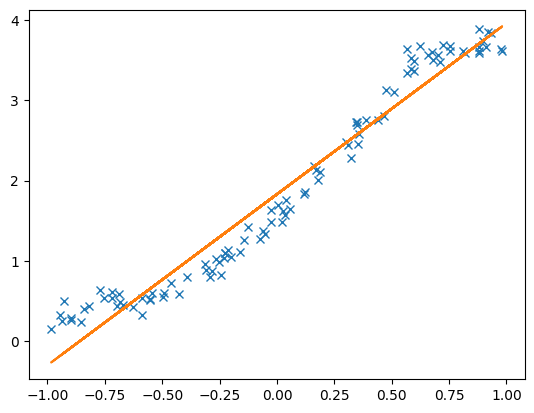

In [17]:
from sklearn.linear_model import LinearRegression
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
model = LinearRegression().fit(X, Y) # use X as is
Z = model.predict(X)
plt.plot(X, Y, 'x')
plt.plot(X, Z)
plt.savefig("nonlinear_fit_sklearn.pdf")

In [18]:
X

array([[-0.58901529],
       [-0.22975878],
       [ 0.17776295],
       [ 0.11987494],
       [-0.89769416],
       [ 0.72281299],
       [-0.81791107],
       [ 0.71179779],
       [-0.16016305],
       [-0.8394743 ],
       [ 0.75465501],
       [ 0.18540455],
       [-0.54661439],
       [-0.02441544],
       [-0.26585953],
       [-0.1255042 ],
       [ 0.44136865],
       [ 0.46576739],
       [ 0.05517012],
       [-0.21252718],
       [ 0.88058705],
       [-0.93513798],
       [-0.55250552],
       [-0.46043753],
       [-0.62590641],
       [ 0.98067392],
       [-0.89757201],
       [ 0.8182308 ],
       [-0.92910682],
       [ 0.34939921],
       [ 0.92046567],
       [ 0.35608167],
       [-0.69665033],
       [ 0.89878759],
       [ 0.32405919],
       [-0.28145877],
       [ 0.87828821],
       [ 0.58421205],
       [ 0.03494102],
       [ 0.02534612],
       [ 0.02081329],
       [-0.58633628],
       [ 0.5976195 ],
       [-0.39351073],
       [ 0.7536796 ],
       [ 0